In [1]:
# This notebook is best viewed in slide mode with certain nbextensions enabled: "RISE", hide input", "splitcells".
# It will look different "odd" without these extensions.
# This following change of search path is not good practice but allows me to keep the presentation slides apart from
# tutorial notebook (since the L96_model.py is not an installed package).
import sys

sys.path.append("../")

# L96 analogs for this project

## Analog for the real world

In 1996, Lorenz proposed a two-time scale dynamical system, referred to as the Lorenz-96 model, whose bahvaior mimics the non-linear bahvior of the extratropical atmosphere with simplified representation of multiscale interactions and nonlinear advection [Lorenz (1996)](https://www.ecmwf.int/en/elibrary/10829-predictability-problem-partly-solved). The lorenz-96 model consists of a set of equations coupling two scales of variables evolving over slow and fast timescales and arranged around a latitude circle as shown in Fig. 1.

More precisely, the Lorenz-96 model includes $K$ slow (or low-frequency) variables, noted $X_k$, $k=1,\ldots,K$ and each slow variable $X_k$ is coupled with $J$ fast (or high-frequency) variables $Y_{j,k}$ , $j=1,\ldots,J$. Therefore, the Lorenz-96 model is described with the following $K+JK$ equations:
\begin{align}
\frac{d}{dt} X_k
&= - X_{k-1} \left( X_{k-2} - X_{k+1} \right) - X_k + F - \left( \frac{hc}{b} \right) \sum_{j=0}^{J-1} Y_{j,k} \ ,
\\
\frac{d}{dt} Y_{j,k}
&= - cbY_{j+1,k} \left( Y_{j+2,k} - Y_{j-1,k} \right) - c Y_{j,k} + \frac{hc}{b} X_k \ .
\end{align}

In this model, the slow variables $X_k$, $k=1,\ldots,K$ represent the resolved-scale variables in a climate model, while the fast variables $Y_{j,k}$, $j=1,\ldots,J$, $k=1,\ldots,K$ represent the unresolved variables (for instance variables representing cloud convection in a climate model).

The model equations are coupled via the mean term $\sum_{j=0}^{J-1} Y_{j,k}$, and the coupling depends on three key parameters: $b$, $c$ and $h$. The parametr $b$ determines the magnitude of the nonlinear interactions among the fast variables. The parameter $c$ controls how rapidly the fast variables fluctuate compared to the slow variables. Finally, the parameter $h$ governs the strengh of the coupling between the slow and fast variables. 

The chaotic dynamical system Lorenz-96 is very useful for testing different numerical methods in atmospheric modeling thanks to its transparency, computational cheapness and simplicity compared to Global Climate Models (GCM) including a full general circulation modeling. The interaction between variables of different scales makes the Lorenz-96 model of particular interest when evaluating new parameterization methodologies. As such, it was used in assessing different techniques that were later incorporated into GCMs ([Crommeling (2008)](https://journals.ametsoc.org/view/journals/atsc/65/8/2008jas2566.1.xml), [Dorrestijn (2013)](https://royalsocietypublishing.org/doi/10.1098/rsta.2012.0374)).


The Lorenz-96 model has been extensively used as a test bed in various studies including data assimilation approaches ([Law (2016)](https://www.sciencedirect.com/science/article/pii/S0167278915002766?via%3Dihub), [Hatfield (2018)](https://journals.ametsoc.org/view/journals/mwre/146/1/mwr-d-17-0132.1.xml)), stochastic parameterization schemes ([Kwasniok (2012)](https://royalsocietypublishing.org/doi/10.1098/rsta.2011.0384), [Arnold (2013)](https://royalsocietypublishing.org/doi/full/10.1098/rsta.2011.0479), [Chorin (2015)](https://www.pnas.org/doi/10.1073/pnas.1512080112))  and Machine Learning-based parameterization methodologies ([Schneider (2017)](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2017GL076101), [Dueben (2018)](https://gmd.copernicus.org/articles/11/3999/2018/), [Watson (2019)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018MS001597), [GagneII (2020)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019MS001896)).


<img src="https://www.researchgate.net/publication/319201436/figure/fig1/AS:869115023589376@1584224577926/Visualisation-of-a-two-scale-Lorenz-96-system-with-J-8-and-K-6-Global-scale-values.png" width=400> *Fig. 1: Visualisation of a two-scale Lorenz '96 system with J = 8 and K = 6. Global-scale variables ($X_k$) are updated based on neighbouring variables and on the local-scale variables ($Y_{j,k}$) associated with the corresponding global-scale variable. Local-scale variabless are updated based on neighbouring variables and the associated global-scale variable. The neighbourhood topology of both local and global-scale variables is circular. Image from [Exploiting the chaotic behaviour of atmospheric models with reconfigurable architectures - Scientific Figure on ResearchGate.](https://www.researchgate.net/figure/Visualisation-of-a-two-scale-Lorenz-96-system-with-J-8-and-K-6-Global-scale-values_fig1_319201436)*


# The real world

The values for the parameters $F$, $J$ and $K$ are fixed based on [Wilks (2005)](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1256/qj.04.03) such that:
- $F=18$ or $20$ ,
- $K=8$ ,
- $J=32$ .

The value chosen for the parameter $F$ is set large enough to ensure chaotic bahvior. We also use these reference values for the $h$, $b$ and $c$ parameters:
- $h=1$ , 
- $b=10$ , 
- $c=10$ .

With this particular choice of parameter values, one model time unit (MTU) is approximately equivalent to five atmospheric days. This estimate is obtained by comparing error-doubling times in the Lorenz-96 model and the atmosphere [Lorenz (1996)](https://www.ecmwf.int/en/elibrary/10829-predictability-problem-partly-solved).

In the following code, we solve the Lorenz-96 system using an accurate time-stepping scheme (RK4 with sufficiently small $\Delta t$). We also plot the obtained solution for the $X_k$ and $Y_{j,k}$ variables. 


CPU times: user 2.04 s, sys: 376 ms, total: 2.41 s
Wall time: 2.11 s


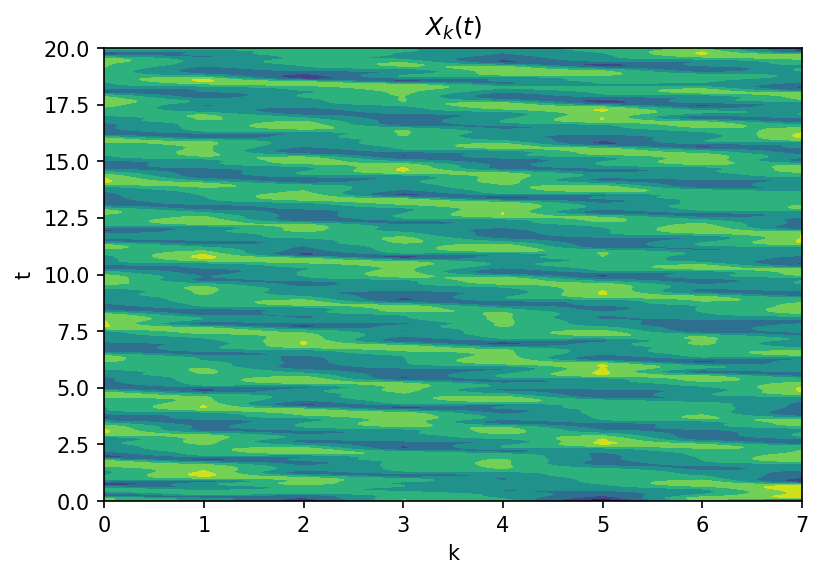

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from L96_model import L96

np.random.seed(23)
W = L96(8, 32)

%time X,Y,t = W.run(0.01, 20.)

plt.figure(dpi=150)
plt.contourf(W.k, t, X)
plt.xlabel("k")
plt.ylabel("t")
plt.title("$X_k(t)$");

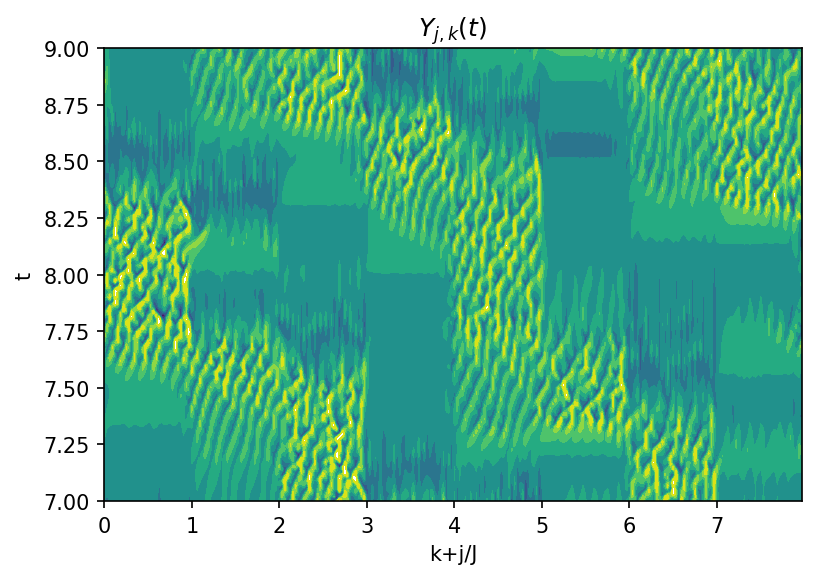

In [3]:
plt.figure(dpi=150)
plt.contourf(W.j / W.J, t, Y, levels=np.linspace(-1, 1, 10))
plt.xlabel("k+j/J")
plt.ylabel("t")
plt.title("$Y_{j,k}(t)$")
yl = plt.ylim(7, 9);

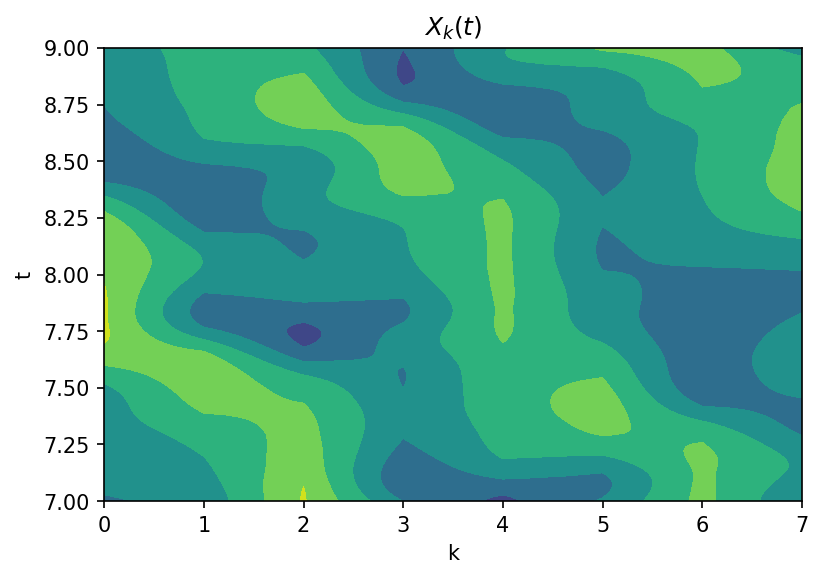

In [4]:
plt.figure(dpi=150)
plt.contourf(W.k, t, X)
plt.xlabel("k")
plt.ylabel("t")
plt.title("$X_k(t)$")
plt.ylim(yl);

# Analog for  GCM

In this study, the two-scale Lorenz-96 system introduced above is treated as the "truth" or "real-world" model which we aim to forecast or simulate. The physical equations of motion of the system describing the atmosphere dynamics are known. However, it is not feasible to explicitley solve them within Global Climate Models (GCM) due to the unresolved smallest scales and limited computational resources. Given this constraint for GCM, the Lorenz-96 system is commonly treated as the full (or "truth") model, while a forecast (or an approximate) model is constructed by replacing the coupling terms between the slow and fast variables ($\left( \frac{hc}{b} \right) \sum_{j=0}^{J-1} Y_{j,k}$) with a sub-grid parameterization tendency that we note $U_k$, $k=1,\ldots,k$. The one time-scale Lorenz-96 equation corresponding to such an approxiamte model can be expressed as follows:

\begin{align}
\frac{d}{dt} X_k
&= - X_{k-1} \left( X_{k-2} - X_{k+1} \right) - X_k + F - \underbrace{ 
\left( \frac{hc}{b} \right) \sum_{j=0}^{J-1} Y_{j,k}
}_{=U_k} \ .
\end{align}


# The parametization $P(X_k)$

We consider the particular choice of modeling the unknown parameterization of the "unresolved processes" with a plynomial approximation such that the one time-scale equation of the Lorenz-96 model can be written as:
\begin{align}
\frac{d}{dt} X_k
&= - X_{k-1} \left( X_{k-2} - X_{k+1} \right) - X_k + F - P\left( X_k \right) \ .
\end{align}
Note the sign of the slope of $P(X_k)$ determines sign of the feedback.

Examples of such a parameterization include the form proposed by
[Wilks (2005)](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1256/qj.04.03): $P(X_k)=b_0 + b_1 X_k + b_2 X_k^2 + b_3 X_k^3 + b_4 X_k^4 + e_k$ where $e_k$ is a stochastic component. One could also use a lower-order polynomial as suggested by
[Arnold (2013)](https://royalsocietypublishing.org/doi/10.1098/rsta.2011.0479): $P(X_k)=b_0 + b_1 X_k + b_2 X_k^2 + b_3 X_k^3 + e_k$.

With the "real world" system in hand, we can "observe" the sub-grid forcing on the large scale and we model the actual coupling, $U_k$, with the polynomial function $P(X_k)$.

In the following code, we solve the one time-scale Lorenz-96 system using an inaccurate time-stepping (Euler-forward with only-just stable $\Delta t$) and an unknown parameterization of the "unresolved processes", $P(X_k)$.



In [5]:
%time X, Y, t = W.run(0.05, 200.)

CPU times: user 7.11 s, sys: 50.3 ms, total: 7.16 s
Wall time: 7.28 s


In [6]:
Xsamp = X
Usamp = (W.h * W.c / W.b) * Y.reshape((Y.shape[0], W.K, W.J)).sum(axis=-1)
p = np.polyfit(Xsamp.flatten(), Usamp.flatten(), 1)
print("Poly coeffs:", p)

Poly coeffs: [0.85439536 0.75218026]


In the next plots, we compare the results obtained with a linear polynomial approximation, [Wilks (2005)'](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1256/qj.04.03) polynomial parameterization and the "truth" values of the coupling terms.

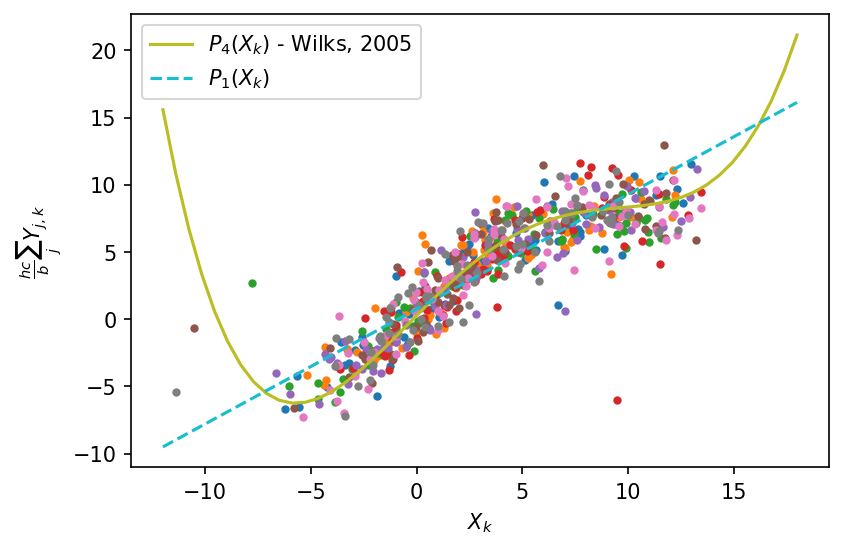

In [7]:
plt.figure(dpi=150)
plt.plot(Xsamp[::50, :], Usamp[::50, :], ".")
plt.xlabel("$X_k$")
plt.ylabel(r"$\frac{hc}{b}\sum_j Y_{j,k}$")
x = np.linspace(-12, 18)
p18 = [0.000707, -0.0130, -0.0190, 1.59, 0.275]  # Polynomial from Wilks, 2005
plt.plot(x, np.polyval(p18, x), label="$P_4(X_k)$ - Wilks, 2005")
plt.plot(x, np.polyval(p, x), "--", label="$P_1(X_k)$")
plt.legend();

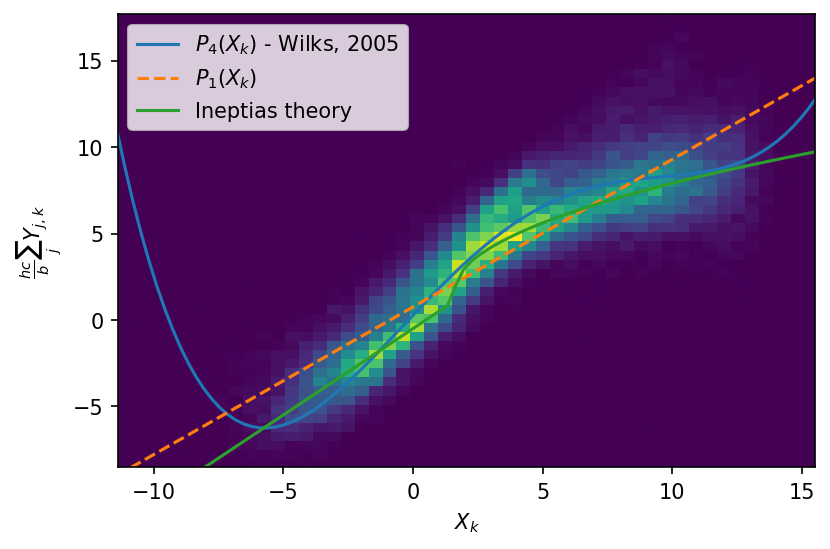

In [8]:
plt.figure(dpi=150)
plt.hist2d(Xsamp.flatten(), Usamp.flatten(), bins=50)
plt.xlabel("$X_k$")
plt.ylabel(r"$\frac{hc}{b}\sum_j Y_{j,k}$")
x = np.linspace(-12, 18, 100)
p18 = [0.000707, -0.0130, -0.0190, 1.59, 0.275]  # Polynomial from Wilks, 2005
plt.plot(x, np.polyval(p18, x), label="$P_4(X_k)$ - Wilks, 2005")
plt.plot(x, np.polyval(p, x), "--", label="$P_1(X_k)$")
plt.plot(
    x,
    np.minimum(1.5, x - 0.5) + 2.2 * np.sqrt(np.maximum(0, x - 1.5)),
    label="Ineptias theory",
)
plt.legend();

# The "GCM" model:

Next, we compare the predictions obtained with the different models: 
- "Real world": corresponding to the "truth" model goverened by the full two time-scale Lorenz-96 system.
- GCM w/o parameterization: corresponding to the one time-scale Lorenz-96 system without any the coupling term.
- GCM with our parameterization: corresponding to the one time-scale Lorenz-96 system with the linear polynomial approximation of the coupling terms as obtained above.
- GCM with [Wilks (2005)'](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1256/qj.04.03) parameterization: corresponding to the one time-scale Lorenz-96 system with a third-order polynomial approximation of the coupling terms.




In [9]:
from L96_model import L96_eq1_xdot


def GCM(X0, F, dt, nt, param=[0]):
    time, hist, X = dt * np.arange(nt), np.zeros((nt, len(X0))) * np.nan, X0.copy()

    for n in range(nt):
        X = X + dt * (L96_eq1_xdot(X, F) - np.polyval(param, X))
        if np.abs(X).max() > 1e3:
            break
        hist[n], time[n] = X, dt * (n + 1)
    return hist, time


np.random.seed(13)
T = 5
Xtrue, Ytrue, Ttrue = W.randomize_IC().run(0.05, T)
Xinit, dt, Fmod = Xtrue[0] + 0.0 * np.random.randn(W.K), 0.002, W.F + 0.0
Xgcm1, Tgcm1 = GCM(Xinit, Fmod, dt, int(T / dt))
Xgcm2, Tgcm2 = GCM(Xinit, Fmod, dt, int(T / dt), param=p)
Xgcm3, Tgcm3 = GCM(Xinit, Fmod, dt, int(T / dt), param=p18)

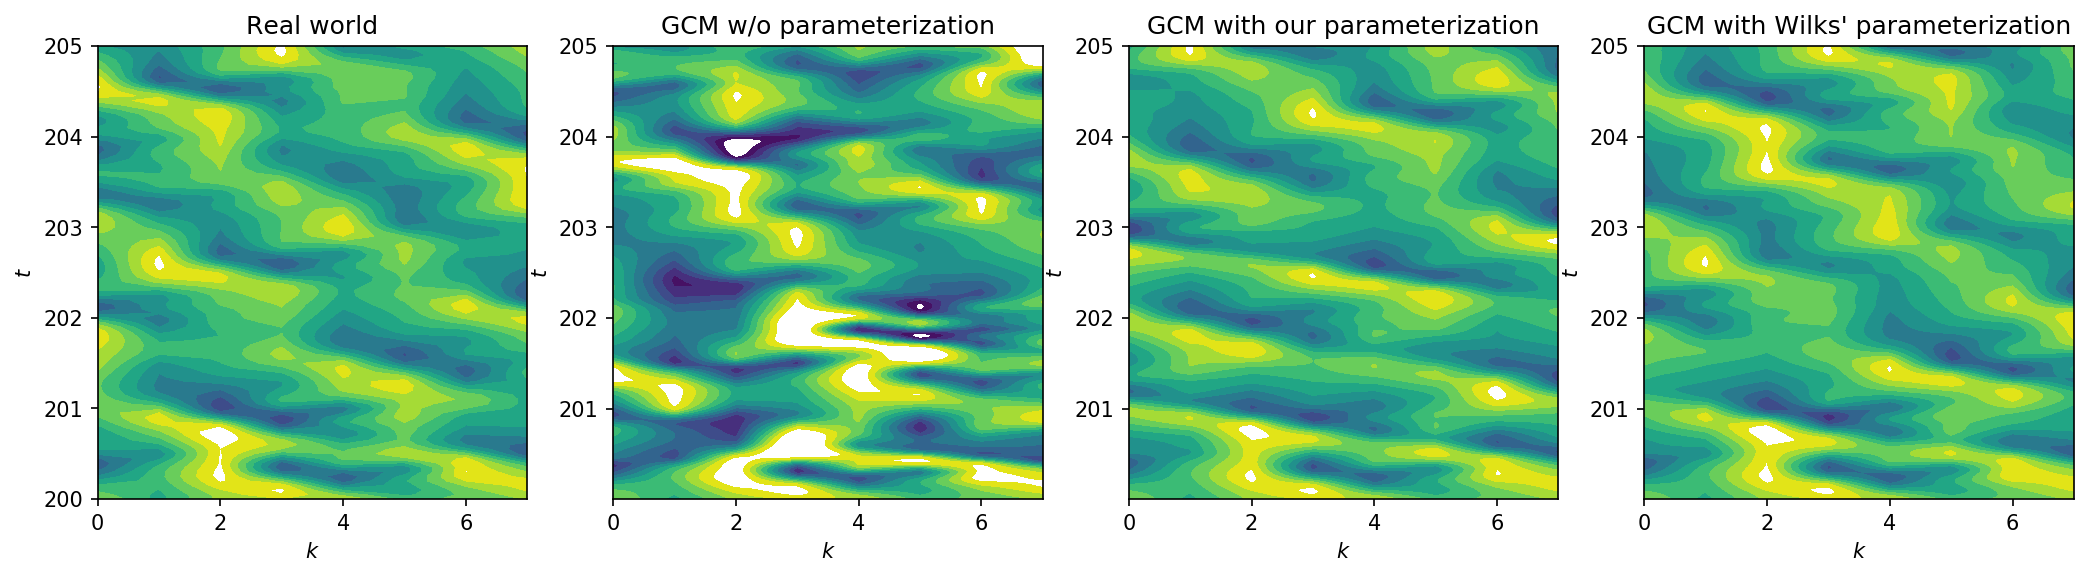

In [10]:
plt.figure(dpi=150, figsize=(17, 4))
lims = {"vmin": -12, "vmax": 12, "levels": np.linspace(-12, 12, 12)}
plt.subplot(141)
plt.contourf(W.k, Ttrue + t[-1], Xtrue, **lims)
plt.xlabel("$k$")
plt.ylabel("$t$")
plt.title("Real world")
plt.subplot(142)
plt.contourf(W.k, Tgcm1 + t[-1], Xgcm1, **lims)
plt.xlabel("$k$")
plt.ylabel("$t$")
plt.title("GCM w/o parameterization")
plt.subplot(143)
plt.contourf(W.k, Tgcm3 + t[-1], Xgcm2, **lims)
plt.xlabel("$k$")
plt.ylabel("$t$")
plt.title("GCM with our parameterization")
plt.subplot(144)
plt.contourf(W.k, Tgcm2 + t[-1], Xgcm3, **lims)
plt.xlabel("$k$")
plt.ylabel("$t$")
plt.title("GCM with Wilks' parameterization");

The next plot shows the temporal evolution of the variable $X_3$ obtained with the four models listed above.

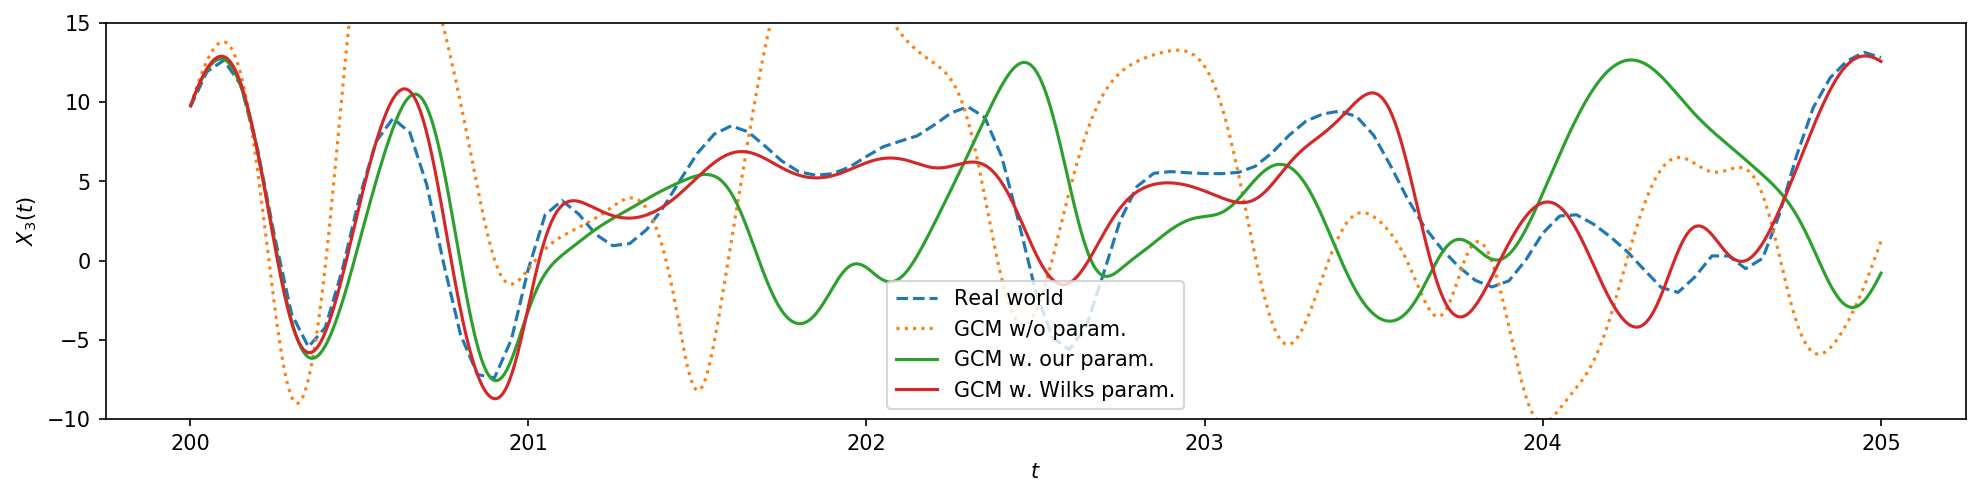

In [11]:
k = 3
plt.figure(dpi=150, figsize=(16, 3.5))
plt.plot(Ttrue + t[-1], Xtrue[:, k], "--", label="Real world")
plt.plot(Tgcm1 + t[-1], Xgcm1[:, k], ":", label="GCM w/o param.")
plt.plot(Tgcm1 + t[-1], Xgcm2[:, k], label="GCM w. our param.")
plt.plot(Tgcm1 + t[-1], Xgcm3[:, k], label="GCM w. Wilks param.")
plt.xlabel("$t$")
plt.ylabel("$X_3(t)$")
plt.legend()
plt.ylim(-10, 15);

# Model error

We consdier the following 4 sources of error:

- Missing physics, which is modeled with a GCM without parameterization: corresponding to the one time-scale Lorenz-96 system without any the coupling term.
- Poorly parameterized unresolved physics which is studied by considered a first-order and third-order polynomial approximations of the coupling terms:
  - $P_4 \rightarrow P_1$
- Unknown forcing which is modeled by adding an error to the forcing term:
  - $F \rightarrow F + error$
- Numerical errors which is studied by increasing the time-step:
  - $\Delta t \rightarrow 10 \Delta t$
- Initialization error which is modeled by adding an error to the initial condition:
  - $X(t=0) \rightarrow X(t=0) + error$
  
The next code estimates these sources of error and the next figure shows their relative contributions. For reference, we also plot the error of the GCM using [Wilks (2005)](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1256/qj.04.03)' polynomial coupling term and without any of the sources of error listed above. All errors are evaluated by comparing the GCMs to the "truth" model goverened by the full two time-scale Lorenz-96 system.

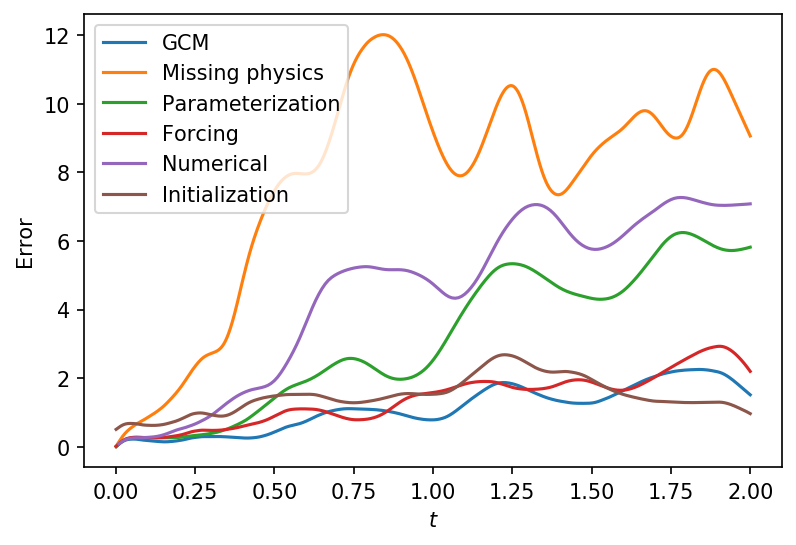

In [12]:
def err(X, Xtrue):
    return np.sqrt(((X - Xtrue[1:, :]) ** 2).mean(axis=1))


np.random.seed(13)
T, dt = 2, 0.001
Xtr, _, _ = W.randomize_IC().set_param(0.0001).run(dt, T)
Xgcm, Tc = GCM(W.X, W.F, dt, int(T / dt), param=p18)
Xfrc, Tc = GCM(W.X, W.F + 1.0, dt, int(T / dt), param=p18)
Xic, Tc = GCM(W.X + 0.5, W.F, dt, int(T / dt), param=p18)
Xdt, Tdt = GCM(W.X, W.F, 10 * dt, int(T / dt / 10), param=p18)
Xphys, _ = GCM(W.X, W.F, dt, int(T / dt))
Xprm, _ = GCM(W.X, W.F, dt, int(T / dt), param=p)

plt.figure(dpi=150)
plt.plot(Tc, err(Xgcm, Xtr), label="GCM")
plt.plot(Tc, err(Xphys, Xtr), label="Missing physics")
plt.plot(Tc, err(Xprm, Xtr), label="Parameterization")
plt.plot(Tc, err(Xfrc, Xtr), label="Forcing")
plt.plot(Tdt, err(Xdt, Xtr[::10]), label="Numerical")
plt.plot(Tc, err(Xic, Xtr), label="Initialization")
plt.xlabel("$t$")
plt.ylabel("Error")
plt.legend();

For this particular set of parameter values, the removal of the coupling term results in the highest error. The second and third sources of error correspond to the numerical error (introduced by increasing the time-step) and to the error resulting form poorly parameterized unresolved physics (modeled by consideing a first-order polynomial approximation of the coupling terms) respectively.

The errors introduced by an unknown forcing and a different initialization are the smallest among the sources of errors considered.

Next, we run the two time-scale Lorenz-96, the GCM with our parameterization corresponding to the one time-scale Lorenz-96 system with the linear polynomial approximation of the coupling terms and the GCM with [Wilks (2005)'](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1256/qj.04.03) parameterization corresponding to the one time-scale Lorenz-96 system with a third-order polynomial approximation of the coupling terms.

In [13]:
# Build a 100-"day" climatology

T, dt = 100.0, 0.001
%time Xclim,Yclim,Tclim = W.run(0.1, T)
%time X1,t1 = GCM(Xinit, Fmod, dt, int(T/dt), param=p)
%time X2,t2 = GCM(Xinit, Fmod, dt, int(T/dt), param=p18)

CPU times: user 35.9 s, sys: 152 ms, total: 36 s
Wall time: 36.7 s
CPU times: user 1.55 s, sys: 11.1 ms, total: 1.56 s
Wall time: 1.57 s
CPU times: user 2.16 s, sys: 11.5 ms, total: 2.17 s
Wall time: 2.19 s


We compare the mean values of the slow variables $X_k$ , $k=1,\ldots,K$.



       Truth      P1   Wilks
mean:  3.741   2.926   3.750
std:   4.679   4.375   4.524


/Users/mohamedazizbhouri/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


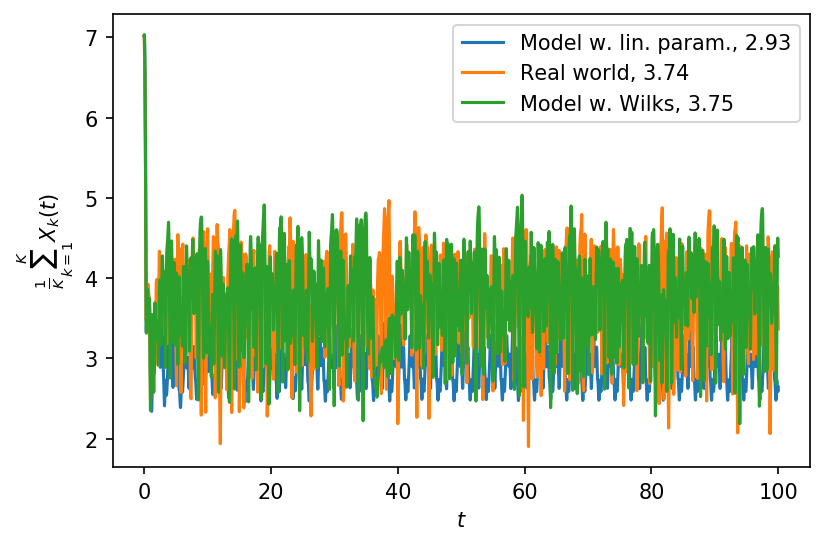

In [14]:
plt.figure(dpi=150)
plt.plot(t1, X1.mean(axis=1), label="Model w. lin. param., %.2f" % (X1.mean()))
plt.plot(Tclim, Xclim.mean(axis=1), label="Real world, %.2f" % (Xtrue.mean()))
plt.plot(t2, X2.mean(axis=1), label="Model w. Wilks, %.2f" % (X2.mean()))
plt.xlabel("$t$")
plt.ylabel(r"$\frac{1}{K}\sum_{k=1}^K X_k(t)$")
plt.legend()
print("\n\n       Truth      P1   Wilks")
print("mean:  %.3f   %.3f   %.3f" % (Xtrue.mean(), X1.mean(), X2.mean()))
print("std:   %.3f   %.3f   %.3f" % (Xtrue.std(), X1.std(), X2.std()))

As expected, the [Wilks (2005)](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1256/qj.04.03)' parameterization gives a mean value of the slow variables that is closer to the one obtained with the "truth" model compared to the model with linear parameterization since [Wilks (2005)'](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1256/qj.04.03) coupling term is modeled with a third-order polynomial.

Next, we consider the model with the full parameterization proposed by [Wilks (2005)](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1256/qj.04.03) by adding a stochastic component such that the parameterization has the following form: $P(X_k)=b_0 + b_1 X_k + b_2 X_k^2 + b_3 X_k^3 + b_4 X_k^4 + e_k$ where $e_k$ is a stochastic component.

In [15]:
def GCMs(X0, F, dt, nt, param=[0], stoch=1.0, phi=0.984):
    time, hist, X = dt * np.arange(nt), np.zeros((nt, len(X0))) * np.nan, X0.copy()
    ek = np.zeros(X.size)

    for n in range(nt):
        # Red noise
        ek = phi * ek + stoch * np.sqrt((1 - phi) * (1 + phi)) * np.random.randn(X.size)
        X = X + dt * (L96_eq1_xdot(X, F) - np.polyval(param, X) + stoch * ek)
        if np.abs(X).max() > 1e3:
            break
        hist[n], time[n] = X, dt * (n + 1)
    return hist, time


np.random.seed(31)
%time X3,t3 = GCMs(Xinit, Fmod, dt, int(T/dt), param=p18)

print("\n\n       Truth      P1      P4  P4+stoch")
print(
    "mean:  %.3f   %.3f   %.3f   %.3f" % (Xtrue.mean(), X1.mean(), X2.mean(), X3.mean())
)
print("std:   %.3f   %.3f   %.3f   %.3f" % (Xtrue.std(), X1.std(), X2.std(), X3.std()))

CPU times: user 2.97 s, sys: 26.4 ms, total: 2.99 s
Wall time: 3.14 s


       Truth      P1      P4  P4+stoch
mean:  3.741   2.926   3.750   3.758
std:   4.679   4.375   4.524   4.537


By comparing the mean and standard deviation values of the slow variables $X_k$ , $k=1,\ldots,K$, we do not see a significant improvement when adding the stochastic component $e_k$ to the third-order polynomial parameterization.

/Users/mohamedazizbhouri/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


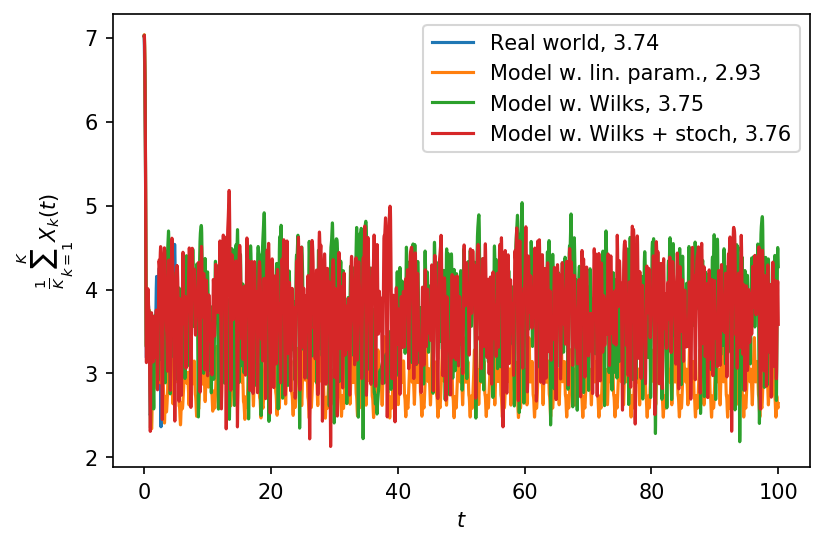

In [16]:
plt.figure(dpi=150)
plt.plot(Ttrue, Xtrue.mean(axis=1), label="Real world, %.2f" % (Xtrue.mean()))
plt.plot(t1, X1.mean(axis=1), label="Model w. lin. param., %.2f" % (X1.mean()))
plt.plot(t2, X2.mean(axis=1), label="Model w. Wilks, %.2f" % (X2.mean()))
plt.plot(t3, X3.mean(axis=1), label="Model w. Wilks + stoch, %.2f" % (X3.mean()))
plt.xlabel("$t$")
plt.ylabel(r"$\frac{1}{K}\sum_{k=1}^K X_k(t)$")
plt.legend();

# Summary

In this chapter:
- We used the two time-scale Lorenz-96 model to generate a real world, or "truth", dataset
- We built a "GCM" with a rudimentary parameterization of coupling to unresolved processes ($\frac{hc}{b}\sum_{j=0}^{J-1} Y_{j,k}$)
  - We deliberately used low-order integration and longer time-step for non-trivial numerical model errors.
  - We compared the different sources of error due to: (1) missing physics, (2) poorly parameterized unresolved physics, (3) unknown forcing, (4) time-discretization numerical approximation and (5) initialization error.
  - We also compared the results obtained with (1) a GCM corresponding to the one time-scale Lorenz-96 system with a linear polynomial parameterization of the coupling terms, (2) a GCM with [Wilks (2005)'](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1256/qj.04.03) parameterization corresponding to the one time-scale Lorenz-96 system with a third-order polynomial approximation of the coupling terms and (3) a GCM with the full [Wilks (2005)'](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1256/qj.04.03) parameterization corresponding to the one time-scale Lorenz-96 system with a third-order polynomial approximation of the coupling terms and a stochastic component.

